### 우선 테스트 데이터셋에서 데이터 하나하나마다 Retrieval Precision 구해야함 -> 개별 데이터에 대한 Retrieval precision 구하는 함수 필요

In [1]:
from acc_prec import evaluate_retrieval_prec_for_questions
            

In [2]:
prec_list = evaluate_retrieval_prec_for_questions("output/output_with_base_api_rag_2.jsonl")

### 이 후에 Precision에 따라 나누기

### baseline rag

In [3]:
from acc_prec import split_precision_group

In [4]:
from acc_prec import calculate_accuracy
precision_test_dict_1 = split_precision_group("output/output_with_base_api_rag_2.jsonl",prec_list)
precision_result_dict_1 = {}

for key in precision_test_dict_1:
    precision_result_dict_1[key] = calculate_accuracy(precision_test_dict_1[key])

In [5]:
precision_result_dict_1

{'<= 0.1': 12.46819338422392,
 '<= 0.2': 69.64285714285714,
 '<= 0.3': 75.86206896551724,
 '<= 0.5': 78.33333333333333,
 '<= 0.6': 96.42857142857143,
 '<= 0.7': 90.9090909090909,
 '<= 0.8': 94.82758620689656,
 '<= 0.9': 99.02912621359224,
 '<= 1.0': 98.48484848484848}

### no rag

In [6]:
prec_list = evaluate_retrieval_prec_for_questions("output/output_with_base_api_rag_2.jsonl")
from acc_prec import calculate_accuracy
precision_test_dict_2 = split_precision_group("output/output_with_no_rag_2.jsonl",prec_list)
precision_result_dict_2 = {}

for key in precision_test_dict_2:
    precision_result_dict_2[key] = calculate_accuracy(precision_test_dict_2[key])

In [7]:
precision_result_dict_2

{'<= 0.1': 13.231552162849871,
 '<= 0.2': 25.0,
 '<= 0.3': 41.37931034482759,
 '<= 0.5': 50.83333333333333,
 '<= 0.6': 64.28571428571429,
 '<= 0.7': 68.18181818181817,
 '<= 0.8': 72.41379310344827,
 '<= 0.9': 70.87378640776699,
 '<= 1.0': 81.06060606060606}

### Astute RAG

In [8]:
prec_list = evaluate_retrieval_prec_for_questions("output/output_with_astute_rag_2.jsonl")
from acc_prec import calculate_accuracy
precision_test_dict_3 = split_precision_group("output/output_with_astute_rag_2.jsonl",prec_list)
precision_result_dict_3 = {}

for key in precision_test_dict_3:
    precision_result_dict_3[key] = calculate_accuracy(precision_test_dict_3[key])

In [9]:
precision_result_dict_3

{'<= 0.1': 25.190839694656486,
 '<= 0.2': 78.57142857142857,
 '<= 0.3': 84.48275862068965,
 '<= 0.5': 93.33333333333333,
 '<= 0.6': 98.21428571428571,
 '<= 0.7': 98.48484848484848,
 '<= 0.8': 96.55172413793103,
 '<= 0.9': 98.05825242718447,
 '<= 1.0': 100.0}

### 시각화

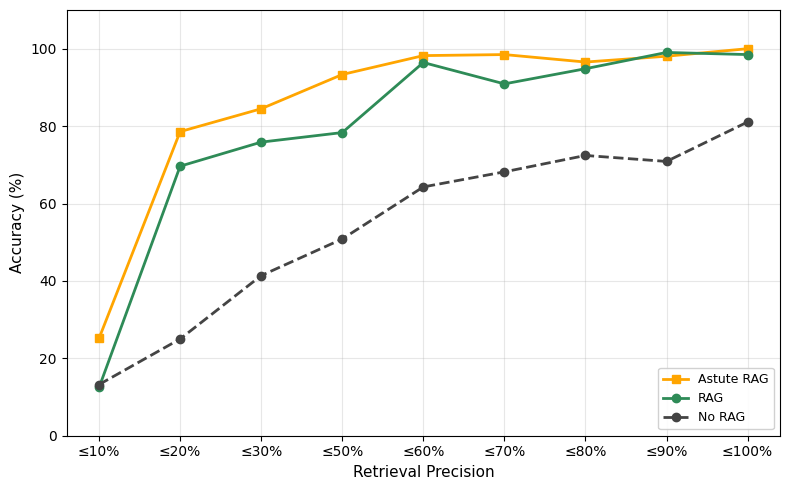

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 스타일 설정
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

# x축 라벨 (0.4 제외, 0.1 ~ 0.9)
x_labels = ['≤10%', '≤20%', '≤30%', '≤50%', '≤60%', '≤70%', '≤80%', '≤90%', '≤100%']
x = np.arange(len(x_labels))

# 각 방법별 accuracy 값 추출 (0.4 제외)
keys = ['<= 0.1', '<= 0.2', '<= 0.3', '<= 0.5', '<= 0.6', '<= 0.7', '<= 0.8', '<= 0.9']

baseline_rag_acc = [precision_result_dict_1.get(key, 0) for key in keys]
no_rag_acc = [precision_result_dict_2.get(key, 0) for key in keys]
astute_rag_acc = [precision_result_dict_3.get(key, 0) for key in keys]

# 직선 라인 그래프 그리기
ax.plot(x, astute_rag_acc, marker='s', markersize=6, linewidth=2, label='Astute RAG', color='#FFA500')
ax.plot(x, baseline_rag_acc, marker='o', markersize=6, linewidth=2, label='RAG', color='#2E8B57')
ax.plot(x, no_rag_acc, marker='o', markersize=6, linewidth=2, linestyle='--', label='No RAG', color='#444444')

# 그래프 꾸미기
ax.set_xlabel('Retrieval Precision', fontsize=11)
ax.set_ylabel('Accuracy (%)', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend(loc='lower right', fontsize=9, framealpha=0.9)

# y축 범위를 데이터에 맞게 자동 조정
all_acc = baseline_rag_acc + no_rag_acc + astute_rag_acc
y_max = max(all_acc) + 10
ax.set_ylim(0, y_max)

ax.grid(True, linestyle='-', alpha=0.3)

# 배경색 설정
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.savefig('accuracy_by_precision.png', bbox_inches='tight', dpi=150)
plt.show()